In [1]:
!pip install numpy
!pip install pandas

In [2]:
import numpy as np 
import pandas as pd

In [3]:
df_iklim = pd.read_csv("https://raw.githubusercontent.com/JihanHayaMufialdo/DataMining-Srikandi/main/climate_data.csv")
df_iklim.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2020,25.0,29.5,27.4,88.0,146.1,3.1,7.0,320.0,3.0,W,96741
1,02-01-2020,25.6,31.3,27.9,83.0,13.5,0.0,5.0,320.0,2.0,W,96741
2,03-01-2020,25.8,30.8,28.6,79.0,0.0,7.3,6.0,350.0,3.0,NW,96741
3,04-01-2020,26.8,30.8,28.2,85.0,6.4,0.8,6.0,300.0,3.0,NW,96741
4,05-01-2020,NaN,30.2,27.8,86.0,1.1,0.8,9.0,290.0,3.0,W,96741


In [4]:
df_stasiun = pd.read_csv("https://raw.githubusercontent.com/JihanHayaMufialdo/DataMining-Srikandi/main/station_detail.csv")
df_stasiun.head()

,station_id,station_name,region_name,latitude,longitude,region_id,province_id
0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
1,96003,Balai Besar Meteorologi Klimatologi dan Geofi...,Kab. Badung,-8.73810,115.17860,272,17
2,96004,Balai Besar Meteorologi Klimatologi dan Geofis...,Kota Makassar,-5.14283,119.45227,412,26
3,96009,Stasiun Meteorologi Malikussaleh,Kab. Aceh Utara,5.22869,96.94749,8,1
4,96011,Stasiun Meteorologi Sultan Iskandar Muda,Kab. Aceh Besar,5.52244,95.41700,6,1


In [5]:
df_provinsi = pd.read_csv("https://raw.githubusercontent.com/JihanHayaMufialdo/DataMining-Srikandi/main/province_detail.csv")
df_provinsi.head()

,province_id,province_name
0,1,Nanggroe Aceh Darussalam
1,2,Sumatera Utara
2,3,Sumatera Barat
3,4,Riau
4,5,Jambi


In [6]:
df_banjir = pd.read_csv("https://raw.githubusercontent.com/JihanHayaMufialdo/DataMining-Srikandi/main/data_banjir.csv")
df_banjir.head()

,date,kejadian,jumlah_kecamatan_terdampak,jumlah_kelurahan_terdampak,jumlah_rw_terdampak,jumlah_rt_terdampak,max_tinggi_air,min_tinggi_air
0,01-01-2020,Ya,4,12,56,76,150,10
1,02-01-2020,Tidak,0,0,0,0,0,0
2,03-01-2020,Tidak,0,0,0,0,0,0
3,04-01-2020,Tidak,0,0,0,0,0,0
4,05-01-2020,Tidak,0,0,0,0,0,0


In [7]:
df_iklim.shape[0]

353

In [8]:
df_banjir.shape[0]

366

In [9]:
# menggabungkan data iklim, stasiun, dan provinsi
df_merge = df_stasiun.merge(df_provinsi, on=["province_id"], how='left')
df_merge = df_iklim.merge(df_merge, on=["station_id"], how='left')
df_merge.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,latitude,longitude,region_id,province_id,province_name
0,01-01-2020,25.0,29.5,27.4,88.0,146.1,3.1,7.0,320.0,3.0,W,96741,Stasiun Meteorologi Maritim Tanjung Priok,Kota Adm. Jakarta Utara,-6.10781,106.88053,154,11,DKI Jakarta
1,02-01-2020,25.6,31.3,27.9,83.0,13.5,0.0,5.0,320.0,2.0,W,96741,Stasiun Meteorologi Maritim Tanjung Priok,Kota Adm. Jakarta Utara,-6.10781,106.88053,154,11,DKI Jakarta
2,03-01-2020,25.8,30.8,28.6,79.0,0.0,7.3,6.0,350.0,3.0,NW,96741,Stasiun Meteorologi Maritim Tanjung Priok,Kota Adm. Jakarta Utara,-6.10781,106.88053,154,11,DKI Jakarta
3,04-01-2020,26.8,30.8,28.2,85.0,6.4,0.8,6.0,300.0,3.0,NW,96741,Stasiun Meteorologi Maritim Tanjung Priok,Kota Adm. Jakarta Utara,-6.10781,106.88053,154,11,DKI Jakarta
4,05-01-2020,NaN,30.2,27.8,86.0,1.1,0.8,9.0,290.0,3.0,W,96741,Stasiun Meteorologi Maritim Tanjung Priok,Kota Adm. Jakarta Utara,-6.10781,106.88053,154,11,DKI Jakarta


In [10]:
# menggabungkan data iklim dan banjir sesuai tanggal
df = pd.merge(df_iklim, df_banjir, on='date')
df.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,kejadian,jumlah_kecamatan_terdampak,jumlah_kelurahan_terdampak,jumlah_rw_terdampak,jumlah_rt_terdampak,max_tinggi_air,min_tinggi_air
0,01-01-2020,25.0,29.5,27.4,88.0,146.1,3.1,7.0,320.0,3.0,W,96741,Ya,4,12,56,76,150,10
1,02-01-2020,25.6,31.3,27.9,83.0,13.5,0.0,5.0,320.0,2.0,W,96741,Tidak,0,0,0,0,0,0
2,03-01-2020,25.8,30.8,28.6,79.0,0.0,7.3,6.0,350.0,3.0,NW,96741,Tidak,0,0,0,0,0,0
3,04-01-2020,26.8,30.8,28.2,85.0,6.4,0.8,6.0,300.0,3.0,NW,96741,Tidak,0,0,0,0,0,0
4,05-01-2020,NaN,30.2,27.8,86.0,1.1,0.8,9.0,290.0,3.0,W,96741,Tidak,0,0,0,0,0,0


In [11]:
df['kejadian'] = df['kejadian'].replace({'Ya': 1, 'Tidak': 0}).astype(int)
df.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,kejadian,jumlah_kecamatan_terdampak,jumlah_kelurahan_terdampak,jumlah_rw_terdampak,jumlah_rt_terdampak,max_tinggi_air,min_tinggi_air
0,01-01-2020,25.0,29.5,27.4,88.0,146.1,3.1,7.0,320.0,3.0,W,96741,1,4,12,56,76,150,10
1,02-01-2020,25.6,31.3,27.9,83.0,13.5,0.0,5.0,320.0,2.0,W,96741,0,0,0,0,0,0,0
2,03-01-2020,25.8,30.8,28.6,79.0,0.0,7.3,6.0,350.0,3.0,NW,96741,0,0,0,0,0,0,0
3,04-01-2020,26.8,30.8,28.2,85.0,6.4,0.8,6.0,300.0,3.0,NW,96741,0,0,0,0,0,0,0
4,05-01-2020,NaN,30.2,27.8,86.0,1.1,0.8,9.0,290.0,3.0,W,96741,0,0,0,0,0,0,0


In [12]:
df.shape

(353, 19)

In [13]:
df.isnull().sum()

date                            0
Tn                             18
Tx                             17
Tavg                            1
RH_avg                          1
RR                            114
ss                              9
ff_x                            1
ddd_x                           1
ff_avg                          1
ddd_car                         0
station_id                      0
kejadian                        0
jumlah_kecamatan_terdampak      0
jumlah_kelurahan_terdampak      0
jumlah_rw_terdampak             0
jumlah_rt_terdampak             0
max_tinggi_air                  0
min_tinggi_air                  0
dtype: int64

# Klasifikasi : Prediksi Kejadian Banjir

## Feature Selection

In [14]:
data = df.drop(["date","Tn","Tx","ff_x","ddd_x","ddd_car","station_id",
                "jumlah_kecamatan_terdampak","jumlah_kelurahan_terdampak",
                "jumlah_rw_terdampak","jumlah_rt_terdampak","max_tinggi_air","min_tinggi_air"],axis=1)
data

,Tavg,RH_avg,RR,ss,ff_avg,kejadian
0,27.4,88.0,146.1,3.1,3.0,1
1,27.9,83.0,13.5,0.0,2.0,0
2,28.6,79.0,0.0,7.3,3.0,0
3,28.2,85.0,6.4,0.8,3.0,0
4,27.8,86.0,1.1,0.8,3.0,0
...,...,...,...,...,...,...
348,29.1,74.0,NaN,5.9,4.0,0
349,28.7,78.0,0.0,7.7,3.0,0
350,28.3,77.0,0.0,6.8,4.0,0
351,27.8,80.0,NaN,2.9,4.0,0


In [15]:
data.isnull().sum()

Tavg          1
RH_avg        1
RR          114
ss            9
ff_avg        1
kejadian      0
dtype: int64

In [16]:
# mengisi data yang kosong dengan rata-rata data per kolom
data['Tavg'].fillna(value=data['Tavg'].mean(),inplace=True)
data['RH_avg'].fillna(value=data['RH_avg'].mean(),inplace=True)
data['RR'].fillna(value=data['RR'].mean(),inplace=True)
data['ss'].fillna(value=data['ss'].mean(),inplace=True)
data['ff_avg'].fillna(value=data['ff_avg'].mean(),inplace=True)

In [17]:
data.isnull().sum()

Tavg        0
RH_avg      0
RR          0
ss          0
ff_avg      0
kejadian    0
dtype: int64

## Split Data

In [18]:
!pip install scikit-learn

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x = data.drop(['kejadian'], axis=1)
Y = data['kejadian']

In [21]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=0)
print(x_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(Y_test.shape)

(282, 5)
(282,)
(71, 5)
(71,)


## Choosing Model

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [23]:
# membangun model dengan decision tree, random forest, dan svc
dt_model = DecisionTreeClassifier().fit(x_train, Y_train)
rf_model = RandomForestClassifier().fit(x_train, Y_train)
svc_model = SVC().fit(x_train, Y_train)
nb_model = GaussianNB().fit(x_train, Y_train)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
# memprediksi data train dan data test menggunakan masing-masing model
ypred_test_dt = dt_model.predict(x_test)
ypred_test_rf = rf_model.predict(x_test)
ypred_test_svc = svc_model.predict(x_test)
ypred_test_nb = nb_model.predict(x_test)

# menghitung akurasi prediksi data test
acc_test_dt = accuracy_score(Y_test, ypred_test_dt)
acc_test_rf = accuracy_score(Y_test, ypred_test_rf)
acc_test_svc = accuracy_score(Y_test, ypred_test_svc)
acc_test_nb = accuracy_score(Y_test, ypred_test_nb)

print("Hasil Evaluasi")
print("==============")
print("Decision Tree : ",acc_test_dt)
print("Random Forest : ",acc_test_rf)
print("SVC : ",acc_test_svc)
print("Naive Bayes : ",acc_test_nb)

Hasil Evaluasi
Decision Tree :  0.8309859154929577
Random Forest :  0.9154929577464789
SVC :  0.9295774647887324
Naive Bayes :  0.8873239436619719


# Regresi : Prediksi Ketinggian Banjir

## Data Visualization

In [26]:
data2 = df

In [27]:
date_list=['tanggal','bulan','tahun']
x=0
for i in date_list:
    data2[i] = data2['date'].str.split('-').str[x]
    data2[i] = pd.to_numeric(data2[i], downcast="float")
    x+=1

In [28]:
df_grafik = data2[['kejadian','tanggal','bulan','tahun']]

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

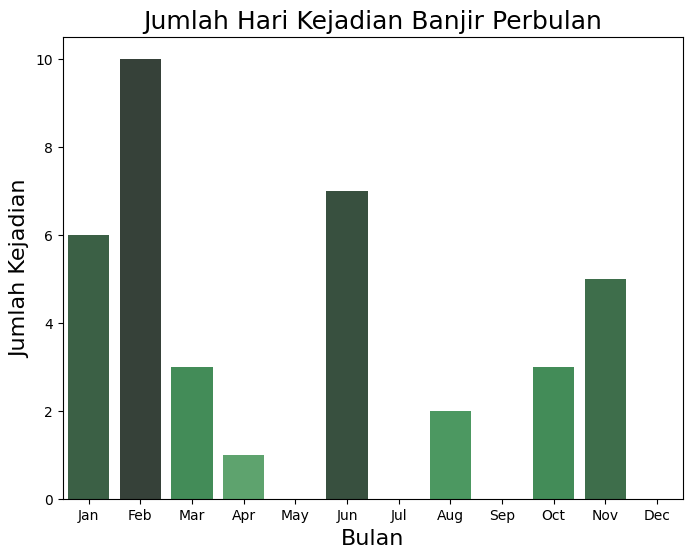

In [30]:
df_bulan = df_grafik.groupby('bulan',as_index=False)['kejadian'].sum()
df_bulan['bulan']=[calendar.month_abbr[int(i)] if pd.notna(i) else i for i in df_bulan['bulan']]
ranks    = df_bulan.kejadian.rank().sub(1).astype(int).array
palette  = sns.color_palette('Greens_d', len(ranks))
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_bulan, x = 'bulan', y = 'kejadian', palette=np.array(palette)[ranks])
plt.title('Jumlah Hari Kejadian Banjir Perbulan', fontsize=18)
plt.ylabel('Jumlah Kejadian', size=16)
plt.xlabel('Bulan', size=16)
None

In [31]:
data2['RR'].fillna(value=data2['RR'].mean(),inplace=True)

In [32]:
subset_data = data2[data2['kejadian'] == 1]
subset_data.shape

(37, 22)

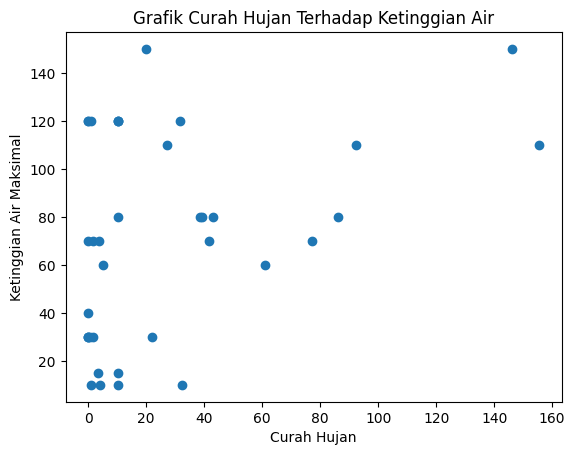

In [33]:
plt.scatter(subset_data['RR'], subset_data['max_tinggi_air'])
plt.xlabel('Curah Hujan')
plt.ylabel('Ketinggian Air Maksimal')
plt.title('Grafik Curah Hujan Terhadap Ketinggian Air')
plt.show()

## Feature Selection

In [34]:
X = np.array(subset_data['RR'])
y = np.array(subset_data['max_tinggi_air'])

In [35]:
# menggabungkan data curah hujan dan ketinggian banjir
data_xy = np.column_stack((X,y))

## Outlier Detecting

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()
model.fit(data_xy[:, 0].reshape(-1, 1), data_xy[:, 1])

# menghitung residual atau kesalahan prediksi
residuals = np.abs(data_xy[:, 1] - model.predict(data_xy[:, 0].reshape(-1, 1)))

# menentukan ambang batas untuk outlier
threshold = 1.5 * np.std(residuals)

# menyaring data yang tidak termasuk outlier
filtered_data = data_xy[residuals < threshold, :]

In [38]:
filtered_data.shape

(21, 2)

## Split Data

In [39]:
# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(filtered_data[:, 0].reshape(-1, 1), 
                                                    filtered_data[:, 1], 
                                                    test_size=0.2, 
                                                    random_state=2)

## Data Modeling

In [40]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Model Evaluation

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2 = r2_score(y_test, y_pred)
print("R-squared score :", r2)

R-squared score : 0.766738201959114


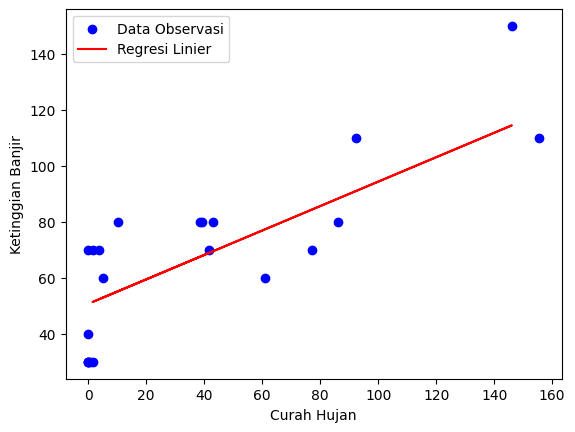

In [43]:
plt.scatter(filtered_data[:, 0], filtered_data[:, 1], color='blue', label='Data Observasi')
plt.plot(X_test, y_pred, color='red', label='Regresi Linier')
plt.xlabel('Curah Hujan')
plt.ylabel('Ketinggian Banjir')
plt.legend()
plt.show()

# Uji Data Dummy

In [44]:
dummy = pd.read_csv("https://raw.githubusercontent.com/JihanHayaMufialdo/DataMining-Srikandi/main/data_dummy.csv")
dummy.head()

,Tavg,RH_avg,RR,ss,ff_avg
0,26.9,80,99.8,0.0,3
1,27.6,80,170.7,0.0,3
2,28.6,82,36.0,9.1,2
3,28.7,78,0.5,4.0,2
4,29.1,74,7.0,9.3,3


In [45]:
dummy.isnull().sum()

Tavg      0
RH_avg    0
RR        0
ss        0
ff_avg    0
dtype: int64

In [46]:
# membuat prediksi kejadian banjir dengan model svc
prediksi = rf_model.predict(dummy)
prediksi

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1])

In [47]:
# menambahkan kolom kejadian ke dalam data dummy
dummy['kejadian'] = prediksi
dummy['kejadian'] = dummy['kejadian'].replace({1:'Ya' , 0:'Tidak'}).astype(str)
dummy

,Tavg,RH_avg,RR,ss,ff_avg,kejadian
0,26.9,80,99.8,0.0,3,Tidak
1,27.6,80,170.7,0.0,3,Tidak
2,28.6,82,36.0,9.1,2,Tidak
3,28.7,78,0.5,4.0,2,Tidak
4,29.1,74,7.0,9.3,3,Tidak
5,27.4,79,142.3,1.0,2,Ya
6,28.2,81,0.0,5.4,3,Tidak
7,27.1,84,78.9,0.0,3,Tidak
8,26.8,83,161.3,1.5,4,Ya
9,27.6,82,18.4,5.9,2,Tidak


In [48]:
dummy = dummy[dummy['kejadian'] == 'Ya']
dummy

,Tavg,RH_avg,RR,ss,ff_avg,kejadian
5,27.4,79,142.3,1.0,2,Ya
8,26.8,83,161.3,1.5,4,Ya
16,27.1,80,150.0,0.2,3,Ya
26,27.2,78,146.7,0.8,3,Ya


In [49]:
X_dummy = np.array(dummy['RR'].values.reshape(-1, 1))
prediksi2 = model.predict(X_dummy)
prediksi2

array([112.83218647, 121.12206507, 116.19176885, 114.75194783])

In [50]:
dummy.loc[:, 'ketinggian_maks_air'] = prediksi2.astype(int)
dummy

C:\Users\J I H A N\AppData\Local\Temp\ipykernel_30268\2598564665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy.loc[:, 'ketinggian_maks_air'] = prediksi2.astype(int)


,Tavg,RH_avg,RR,ss,ff_avg,kejadian,ketinggian_maks_air
5,27.4,79,142.3,1.0,2,Ya,112
8,26.8,83,161.3,1.5,4,Ya,121
16,27.1,80,150.0,0.2,3,Ya,116
26,27.2,78,146.7,0.8,3,Ya,114


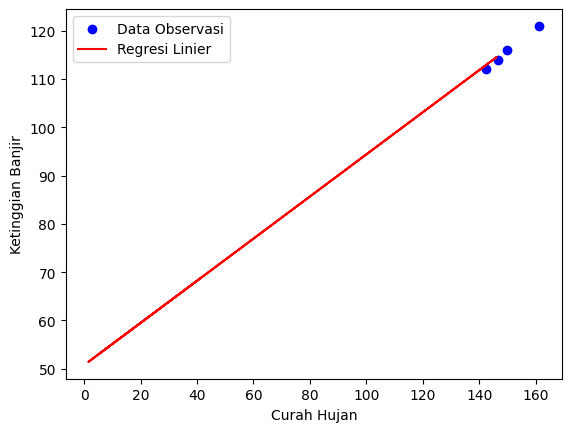

In [51]:
plt.scatter(dummy['RR'], dummy['ketinggian_maks_air'], color='blue', label='Data Observasi')
plt.plot(X_test, y_pred, color='red', label='Regresi Linier')
plt.xlabel('Curah Hujan')
plt.ylabel('Ketinggian Banjir')
plt.legend()
plt.show()

In [52]:
def tingkat_kewaspadaan(ketinggian):
    if ketinggian > 120:
        return 'Tinggi'
    elif ketinggian > 110:
        return 'Sedang'
    elif ketinggian > 100:
        return 'Rendah'

In [53]:
dummy.loc[:, 'kewaspadaan'] = dummy['ketinggian_maks_air'].apply(tingkat_kewaspadaan)

C:\Users\J I H A N\AppData\Local\Temp\ipykernel_30268\1492155415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy.loc[:, 'kewaspadaan'] = dummy['ketinggian_maks_air'].apply(tingkat_kewaspadaan)


In [54]:
dummy

,Tavg,RH_avg,RR,ss,ff_avg,kejadian,ketinggian_maks_air,kewaspadaan
5,27.4,79,142.3,1.0,2,Ya,112,Sedang
8,26.8,83,161.3,1.5,4,Ya,121,Tinggi
16,27.1,80,150.0,0.2,3,Ya,116,Sedang
26,27.2,78,146.7,0.8,3,Ya,114,Sedang
